*In this notebook:*<br>
CRISP-DM: Step 1 and Step 2
* **Understanding the Data** and develope ideas for **Business Understanding**
---


In [1]:
#import numpy as np
import pandas as pd

from ExploreData import sort_mean, value_counter, index_by_key

# Load csv-documents to data frames
df_listings = pd.read_csv('./data/listings.csv')
df_reviews = pd.read_csv('./data/reviews.csv')
df_calendar = pd.read_csv('./data/calendar.csv')

## A First Look

Three Data Sets:
* Listings
* Calendar information one year into the future
* Reviews with date from past years

A quick look at the data frames shows, that the connecting column is the listing_id. So, if needed, the data sets can be joined together.<br>
The reviews data set contains mainly a review text with a name the date. <br>
The calendar data set has only four columns with a date and a price for the time a listing is available. <br>
That leaves the listings data set with 92 columns and nearly 4000 rows as the main data set.

In [2]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [3]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
# lisitings: dimensions
df_listings.shape

(3818, 92)

## A Closer Look: The Listings Data-Set
Below one can see the data set contains a broad set of information.<br>
It seems that the reviews and calendar data is also represented for example in features like `availability` or `reviews_per_month`.<br>
There are relatively many object columns, some appear to contain pure text.<br>
A detailed look at the object columns is definitely necessary - columns like `price` or `cleaning_fee` sound as if they could be transformed to a numeric type.
Most columns seem to have only few null-values.

In [6]:
# An overview over the data set:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

The data set contains information about the listings property, host, location and reviews combined with price information.<br>
As you can see in the cell below: Not all columns seems relevant for further analysis. For example urls or certain location-columns since the data-set contains only listings from Seattle.

In [7]:
# Select columns from the data-frame
column_names = index_by_key(df_listings,
    ['host', 'price', 'location', 'amenities'])
# Calculate value-information for these columns
df_values = value_counter(df_listings[column_names])

df_values

,val_count,nan_count,val_pcnt,nan_pcnt,col_dtype
host_id,2751,0,72.053431,0.000000,int64
host_url,2751,0,72.053431,0.000000,object
host_name,1466,2,38.397067,0.052383,object
host_since,1380,2,36.144578,0.052383,object
host_location,120,8,3.143007,0.209534,object
host_about,2011,859,52.671556,22.498690,object
host_response_time,4,523,0.104767,13.698271,object
host_response_rate,45,523,1.178628,13.698271,object
host_acceptance_rate,2,773,0.052383,20.246202,object
host_is_superhost,2,2,0.052383,0.052383,object


In [8]:
# What information is stored in the smart_location column?
df_listings['smart_location'].value_counts()

Seattle, WA                  3810
Seattle , WA                    2
West Seattle, WA                2
Ballard, Seattle, WA            1
seattle, wa                     1
Phinney Ridge Seattle, WA       1
西雅图, WA                         1
Name: smart_location, dtype: int64

In [9]:
# What information is stored in review_scores_location?
df_listings['review_scores_location'].value_counts()

10.0    2122
9.0      884
8.0      129
7.0       19
6.0        8
4.0        1
Name: review_scores_location, dtype: int64

Most columns are object-type but **numeric columns** are a lot easier to work with.<br>
* All review_scores are numeric
* Everything counted, too
* The location as longitude and latitude

In [10]:
# Numerical columns
df_num = df_listings.select_dtypes(include=['float','int'])
# Calculate value-informations for the columns
df_num_values = value_counter(df_num)

df_num_values

,val_count,nan_count,val_pcnt,nan_pcnt,col_dtype
id,3818,0,100.000000,0.000000,int64
scrape_id,1,0,0.026192,0.000000,int64
host_id,2751,0,72.053431,0.000000,int64
host_listings_count,27,2,0.707177,0.052383,float64
host_total_listings_count,27,2,0.707177,0.052383,float64
latitude,3818,0,100.000000,0.000000,float64
longitude,3818,0,100.000000,0.000000,float64
accommodates,15,0,0.392876,0.000000,int64
bathrooms,12,16,0.314301,0.419068,float64
bedrooms,8,6,0.209534,0.157150,float64


<AxesSubplot:ylabel='host_is_superhost'>

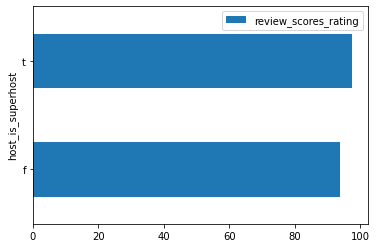

In [11]:
# Have a lock at at the rating
sort_mean(
    df_listings,
    'host_is_superhost',
    'review_scores_rating'
    ).plot(kind='barh')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

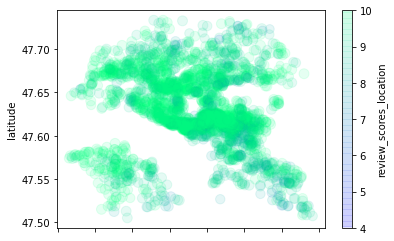

In [15]:
# longitude and latitude:
df_listings.plot(kind='scatter', x='longitude',
    y= 'latitude', s='review_scores_rating',
    c='review_scores_location', colormap='winter', alpha=0.1
    )

In [16]:
# Are there columns with only one value?
num_const = df_num_values.loc[df_num_values['val_count']==1]

num_const

,val_count,nan_count,val_pcnt,nan_pcnt,col_dtype
scrape_id,1,0,0.026192,0.0,int64


In [17]:
# Are ther columns with no values?
num_nan = df_num_values.loc[df_num_values['nan_pcnt']==100]

num_nan

,val_count,nan_count,val_pcnt,nan_pcnt,col_dtype
license,0,3818,0.0,100.0,float64


## Summary

* Focus on the listings data-set
* The object columns need to be cleaned initially before they can be analyzed
* Some columns are uninteresting and can be dropped up front, for example urls, nan-columns, etc